In [1]:
%pylab inline
import pandas as pd 
import fnmatch
import os
from collections import Counter
from stats_helper import *

Populating the interactive namespace from numpy and matplotlib


# Bar chart showing average scores plus std or confidence intervals 

In [2]:
users = pd.read_csv("Crowdclass_Data.csv")
A_summary_stats = users[users["Group"]=="A"]
B_summary_stats = users[users["Group"]=="B"]
# A_summary_stats=groupA_survey.dropna(thresh=5) 
# B_summary_stats =groupB_survey.dropna(thresh=5) 

Excluding uncertainty 

$$\mbox{Score}  = \frac{N_{\mbox{correct}}}{N_{\mbox{correct}}+N_{\mbox{wrong}}}$$

In [3]:
def accuracy(N_correct,N_wrong):
    '''
    returns accuracy based on correct/wrong counts
    
    Some users never get to some questions so they might not have 
    N_correct and N_wrong counts. But this is different from accuracy=0
    So we put a flag of -1 if user accuracy N/A
    '''
    if N_correct+N_wrong ==0:
        return -1/100. #all uncertainty
    else:
        return N_correct/ float(N_correct+N_wrong)

In [7]:
A_pretest_score= []
for i in np.arange(len(A_summary_stats)):
    if (A_summary_stats.iloc[i]['pre_correct'] + A_summary_stats.iloc[i]['pre_wrong']+A_summary_stats.iloc[i]['pre_uncertain']) ==10:
        A_pretest_score.append(accuracy(A_summary_stats.iloc[i]['pre_correct'],A_summary_stats.iloc[i]['pre_wrong']))
B_pretest_score= []
for i in np.arange(len(B_summary_stats)):
    if (B_summary_stats.iloc[i]['pre_correct'] + B_summary_stats.iloc[i]['pre_wrong']+B_summary_stats.iloc[i]['pre_uncertain']) ==10:
        B_pretest_score.append(accuracy(B_summary_stats.iloc[i]['pre_correct'],B_summary_stats.iloc[i]['pre_wrong']))
A_pretest_score = np.array(A_pretest_score)*100.
B_pretest_score = np.array(B_pretest_score)*100.


A_posttest_score= []
for i in np.arange(len(A_summary_stats)):
    if (A_summary_stats.iloc[i]['post_correct'] + A_summary_stats.iloc[i]['post_wrong']+A_summary_stats.iloc[i]['post_uncertain']) ==10:
        A_posttest_score.append(accuracy(A_summary_stats.iloc[i]['post_correct'],A_summary_stats.iloc[i]['post_wrong']))
B_posttest_score= []
for i in np.arange(len(B_summary_stats)):
    if (B_summary_stats.iloc[i]['post_correct'] + B_summary_stats.iloc[i]['post_wrong']+B_summary_stats.iloc[i]['post_uncertain']) ==10:
        B_posttest_score.append(accuracy(B_summary_stats.iloc[i]['post_correct'],B_summary_stats.iloc[i]['post_wrong']))
A_posttest_score = np.array(A_posttest_score)*100.
B_posttest_score = np.array(B_posttest_score)*100.

In [8]:
basic_stats(A_posttest_score,B_posttest_score)

A: mu = 44.734; std = 25.814
B: mu = 67.752; std = 20.065


In [10]:
A_pretest_score = np.delete(A_pretest_score,np.where(A_pretest_score==-1.)[0])
B_pretest_score = np.delete(B_pretest_score,np.where(B_pretest_score==-1.)[0])
A_posttest_score = np.delete(A_posttest_score,np.where(A_posttest_score==-1.)[0])
B_postest_score = np.delete(B_posttest_score,np.where(B_posttest_score==-1.)[0])

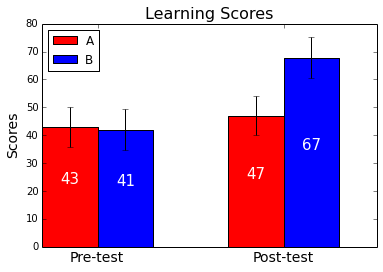

In [11]:
# import seaborn
import scipy.stats as stat
AMeans = [mean(A_pretest_score), mean(A_posttest_score)]
BMeans = [mean(B_pretest_score), mean(B_posttest_score)]
# Astd = [std(A_pretest_score), std(A_posttest_score)]
# Bstd =[std(B_pretest_score), std(B_posttest_score)]
A_yerr = stat.t.interval(0.95,len(A_pretest_score)-1,loc = mean(A_pretest_score), scale=stat.sem(A_pretest_score))- mean(A_pretest_score)
B_yerr = stat.t.interval(0.95,len(B_pretest_score)-1,loc = mean(B_pretest_score), scale=stat.sem(B_pretest_score))- mean(B_pretest_score)
N = 2
ind = np.arange(N)  # the x locations for the groups
width = 0.30       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, AMeans, width, color='r', yerr=A_yerr,ecolor= "black")
rects2 = ax.bar(ind + width, BMeans, width, color='b', yerr=B_yerr,ecolor= "black")

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores',fontsize=14)
ax.set_title('Learning Scores',fontsize=16)
ax.set_xticks(ind + width)
ax.set_xticklabels(('Pre-test', 'Post-test'),fontsize=14)

ax.legend((rects1[0], rects2[0]), ('A', 'B'),"upper left")


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                '%d' % int(height),
                ha='center', va='bottom',color="white",fontsize=15)

autolabel(rects1)
autolabel(rects2)

plt.show()

# q-q plot to check normality 

$R^2$ is the coefficient of determination from regression on q-q plot. 1 means its really close to the distribution we're testing, 0 means no correlation at all. q-q plot test against a given distribution (here the normal distribution) then for each quantile plots the number of datapoints below that % of data. 

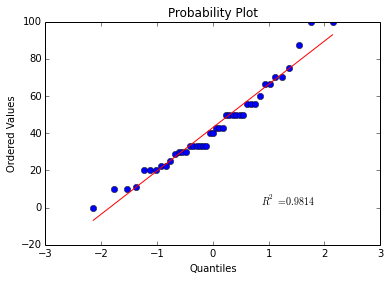

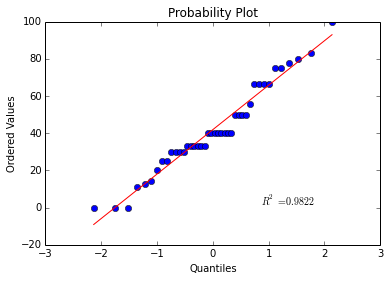

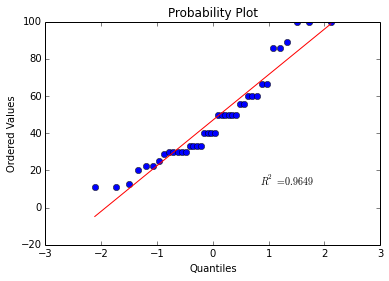

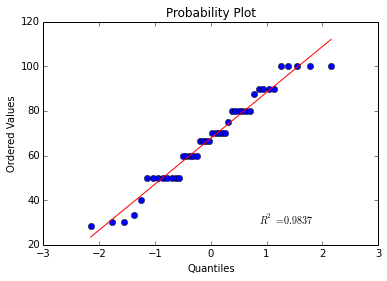

In [12]:
import scipy.stats as stats
plt.figure()
plt1 = stats.probplot(A_pretest_score, dist="norm", plot=pylab)
plt.figure()
plt3 = stats.probplot(B_pretest_score, dist="norm", plot=pylab)

plt.figure()
plt2 = stats.probplot(A_posttest_score, dist="norm", plot=pylab)
plt.figure()
plt4 = stats.probplot(B_posttest_score, dist="norm", plot=pylab)

# Use Shapiro-Wilks to test for normality
- works better than Kolmogorov-Smirnov test for small datasets 

In [27]:
def shapiro_wilks(data,name):
    result = stats.shapiro(data)
    print "{0} : W = {1} ; p ={2} ---> {3}".format(name,np.around(result[0],2),np.around(result[1],2),pcheck(result[1],"Normal"))

In [28]:
shapiro_wilks(A_pretest_score,"A pretest")
shapiro_wilks(B_pretest_score,"B pretest")
shapiro_wilks(A_posttest_score,"A posttest")
shapiro_wilks(B_posttest_score,"B posttest")

A pretest : W = 0.96 ; p =0.16 ---> Normal
B pretest : W = 0.96 ; p =0.17 ---> Normal
A posttest : W = 0.92 ; p =0.01 ---> NOT Normal
B posttest : W = 0.96 ; p =0.09 ---> Normal


# Use Kolmogorov-Smirnov test to see whether data come from the same distribution 

In [29]:
def kolmogorov_smirnov(data1,data2,name):
    result = stats.ks_2samp(data1,data2)
    print "{0} : D = {1} ; p ={2} ---> {3}".format(name,np.around(result[0],2),np.around(result[1],2),pcheck(result[1],"from same distribution"))

In [30]:
def pcheck(p,null_hyp):
    '''
    if p>0.05 then reject null hypothesis
    '''
    if p>0.05:
        return  null_hyp
    else:
        return "NOT "+null_hyp

In [31]:
kolmogorov_smirnov(A_pretest_score,B_pretest_score,"Pretest")
kolmogorov_smirnov(A_posttest_score,B_posttest_score,"Posttest")

Pretest : D = 0.13 ; p =0.83 ---> from same distribution
Posttest : D = 0.43 ; p =0.0 ---> NOT from same distribution


# Welch's t test to test whether there is significant difference between the two distributions 

no significant difference in the means between the two groups

In [18]:
def unpaired_Welch_t(data1,data2,name):
    result =  stats.ttest_ind(a= data1,b= data2,equal_var=False)
#     print result
    print "{0} : t = {1} ; p ={2} ---> {3}".format(name,np.around(result[0],2),np.around(result[1],5),pcheck(result[1],"no significant different in the means of the two groups"))

In [19]:
unpaired_Welch_t(A_pretest_score,B_pretest_score,"Pretest")
unpaired_Welch_t(A_posttest_score,B_posttest_score,"Posttest")

Pretest : t = 0.22 ; p =0.82934 ---> no significant different in the means of the two groups
Posttest : t = -4.19 ; p =7e-05 ---> NOT no significant different in the means of the two groups


##### We have a significant difference in learning score with a medium ~ large effect size 

Cohen's d characterizes the mean difference and Hedge's g is the unbiased estimate of Cohen's d which is esp good for small sample size . 

In [26]:
print "A <- c("+ ','.join(str(p) for p in A_posttest_score)+") \n"
print "B <- c("+ ','.join(str(p) for p in B_posttest_score)+") \n"
print "t.test(A,B, var.equal=F)"

A <- c(40.0,11.1111111111,50.0,22.2222222222,100.0,30.0,60.0,25.0,28.5714285714,50.0,50.0,50.0,60.0,30.0,60.0,100.0,40.0,55.5555555556,85.7142857143,12.5,85.7142857143,50.0,30.0,100.0,88.8888888889,11.1111111111,33.3333333333,40.0,22.2222222222,50.0,33.3333333333,30.0,30.0,55.5555555556,33.3333333333,40.0,33.3333333333,66.6666666667,66.6666666667,20.0) 

B <- c(80.0,50.0,100.0,90.0,80.0,60.0,33.3333333333,50.0,50.0,90.0,70.0,66.6666666667,80.0,75.0,66.6666666667,30.0,60.0,60.0,40.0,80.0,30.0,66.6666666667,80.0,70.0,66.6666666667,90.0,60.0,100.0,90.0,50.0,50.0,50.0,70.0,50.0,50.0,100.0,28.5714285714,60.0,80.0,100.0,100.0,87.5,70.0,70.0) 

t.test(A,B, var.equal=F)


In [21]:
run_all_my_analysis(A_posttest_score,B_posttest_score)

---------------------------------------------------------------------------------

A < B
A: mu = 47.021; std = 24.287
B: mu = 67.752; std = 20.065
A : W = 0.92 ; p =0.00875746365637 ---> NOT Normal
B : W = 0.96 ; p =0.0893302634358 ---> Normal
KS test : D = 0.43 ; p =0.0 ---> NOT from same distribution
Welch's t-test : t = -4.19 ; p =7e-05 ---> NOT no significant different in the means of the two groups
Cohen's d

d estimate: -0.9236338 (large)

95 percent confidence interval:

      inf       sup 

-1.386851 -0.460417 

------------------------
Hedges's g

g estimate: -0.9151601 (large)

95 percent confidence interval:

       inf        sup 

-1.3779610 -0.4523593 

------------------------


In [23]:
run_all_non_parametric_analysis(A_posttest_score,B_posttest_score)

---------------------------------------------------------------------------------

Median
A:  40.0
B:  68.3333333333
A < B
------
A: mu = 47.021; std = 24.287
B: mu = 67.752; std = 20.065
A : W = 0.92 ; p =0.00875746365637 ---> NOT Normal
B : W = 0.96 ; p =0.0893302634358 ---> Normal
	Wilcoxon rank sum test with continuity correction

data:  GroupA and GroupB

 : p =6.769e-05 ---> NOT from same population
W = 436.5, p-value = 6.769e-05

alternative hypothesis: true location shift is not equal to 0

	Exact Wilcoxon-Mann-Whitney Test

data:  v by g (GroupA, GroupB)

Effect Size  = 0.435213760287 -----> Medium
Z = -3.9888, p-value = 4.3e-05

alternative hypothesis: true mu is not equal to 0

Mean ranks of group
[1] 31.4125

Mean ranks of group
[1] 52.57955



# Uncertainty 

In [32]:
from  stats_helper import *

In [33]:
A_pre_uncertain = np.array(A_summary_stats['pre_uncertain'])
B_pre_uncertain = np.array(B_summary_stats['pre_uncertain'])
A_post_uncertain = np.array(A_summary_stats['post_uncertain'])
B_post_uncertain = np.array(B_summary_stats['post_uncertain'])

In [36]:
kolmogorov_smirnov(A_pre_uncertain,B_pre_uncertain,"pre_uncertain")

pre_uncertain : D = 0.23 ; p =0.16 ---> from same distribution


In [37]:
run_all_non_parametric_analysis(A_pre_uncertain,B_pre_uncertain,"pre_uncertain")

---------------------------------------------------------------------------------
pre_uncertain
Median
A:  2.0
B:  4.0
A < B
------
A: mu = 2.957; std = 3.106
B: mu = 4.021; std = 3.393
A : W = 0.84 ; p =1.78970003617e-05 ---> NOT Normal
B : W = 0.9 ; p =0.000549959368072 ---> NOT Normal
	Wilcoxon rank sum test with continuity correction

data:  GroupA and GroupB

W = 895, p-value = 0.1495

alternative hypothesis: true location shift is not equal to 0

	Exact Wilcoxon-Mann-Whitney Test

data:  v by g (GroupA, GroupB)

Effect Size  = 0.149860258922 -----> Small
Z = -1.4452, p-value = 0.1495

alternative hypothesis: true mu is not equal to 0

Mean ranks of group
[1] 42.95652

Mean ranks of group
[1] 50.95745



In [38]:
run_all_non_parametric_analysis(A_post_uncertain,B_post_uncertain,abbrev="post_uncertain")

---------------------------------------------------------------------------------
post_uncertain
Median
A:  1.0
B:  0.0
A > B
------
A: mu = 2.261; std = 2.967
B: mu = 0.468; std = 1.007
A : W = 0.75 ; p =1.76145988462e-07 ---> NOT Normal
B : W = 0.53 ; p =4.76553067841e-11 ---> NOT Normal
	Wilcoxon rank sum test with continuity correction

data:  GroupA and GroupB

W = 1545.5, p-value = 7.378e-05

alternative hypothesis: true location shift is not equal to 0

	Exact Wilcoxon-Mann-Whitney Test

data:  v by g (GroupA, GroupB)

Effect Size  = 0.411462432469 -----> Medium
post_uncertain : p =5.202e-05 ---> NOT from same population
Z = 3.968, p-value = 5.202e-05

alternative hypothesis: true mu is not equal to 0

Mean ranks of group
[1] 57.09783

Mean ranks of group
[1] 37.11702



In [7]:
import scipy.stats as stats

In [13]:
basic_stats(A_pre_uncertain,B_pre_uncertain)

A: mu = 2.579; std = 2.926
B: mu = 4.655; std = 3.467


In [10]:
stats.mannwhitneyu(A_pre_uncertain,B_pre_uncertain)

(359.5, 0.0072034584878341423)

In [14]:
basic_stats(A_post_uncertain,B_post_uncertain)

A: mu = 2.263; std = 2.962
B: mu = 0.345; std = 0.755


In [12]:
stats.mannwhitneyu(A_post_uncertain,B_post_uncertain)

(295.0, 0.00018567222326173555)

In [22]:
Adelta_uncertain = A_pre_uncertain - A_post_uncertain
Bdelta_uncertain = B_pre_uncertain - B_post_uncertain

In [17]:
run_all_my_analysis(Adelta_uncertain,Bdelta_uncertain,abbrev="delta_uncertain")

A: mu = -0.316; std = 1.558
B: mu = -4.31; std = 3.364
A : W = 0.67 ; p =6.1317841471e-08 ---> NOT Normal
B : W = 0.91 ; p =0.0172697808594 ---> NOT Normal
KS test : D = 0.61 ; p =0.0 ---> NOT from same distribution
Welch's t-test : t = 5.83 ; p =0.0 ---> NOT no significant different in the means of the two groups
Cohen's d

d estimate: 1.570669 (large)

95 percent confidence interval:

      inf       sup 

0.9979742 2.1433645 

------------------------
Hedges's g

g estimate: 1.552476 (large)

95 percent confidence interval:

      inf       sup 

0.9813521 2.1236004 

------------------------


In [23]:
stats.mannwhitneyu(Adelta_uncertain,Bdelta_uncertain)

(134.0, 3.031526466602441e-08)

In [25]:
ncol = len(data1)
data1 = Adelta_uncertain
data2 = Bdelta_uncertain
print "GroupA <- c("+ ','.join(str(p) for p in data1)+") \n".format(ncol)
print "GroupB <- c("+ ','.join(str(p) for p in data2)+") \n".format(ncol)

GroupA <- c(0,1,1,0,1,0,0,1,0,-1,2,5,-1,7,0,0,-1,-2,-1,0,0,-1,0,0,0,1,0,0,-1,0,0,0,0,0,0,-1,1,1) 

GroupB <- c(7,0,9,8,10,6,0,3,5,2,1,10,1,1,6,0,7,1,3,4,0,7,4,9,3,10,1,2,5) 



In [31]:
print median(Adelta_uncertain)
print median(Bdelta_uncertain)

0.0
4.0


Effect size (r) $$ r = \frac{Z}{\sqrt{N}}$$

In [33]:
print "r = ", -5.4234/sqrt(len(Adelta_uncertain)+len(Bdelta_uncertain))

r =  -0.662573764522


The medians of Group A and Group B were 0 and 4,respectively. The Mann-Whitney's U test showed a significant effect in the decrease of uncertainty of Group B over Group A(U = 134, Z = -5.42, p =4.09e-9, r = 0.66). The mean ranks of Group A and Group B were 7.8 and 13.2, respectively.

# Scaffolding design 

In [17]:
easy = np.array(B_summary_stats["easy_count"])
medium = np.array(B_summary_stats["med_count"])
hard = np.array(B_summary_stats["hard_count"])

# To Do :

- Look at presentation of data, maybe better to do statistics on $\Delta$score? 

        A = (A_summary_stats['pre_correct']-A_summary_stats['post_correct']).fillna(0)/10.
        B = (B_summary_stats['pre_correct']-B_summary_stats['post_correct']).fillna(0)/10.
- Look at how uncertainty 